Project - House Price Prediction

Importing the dependencies



In [1]:
!pip install flask-ngrok


In [2]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from flask import Flask, request, jsonify
from flask_ngrok import run_with_ngrok  # Added for Google Colab support


In [4]:

# Load the Housing dataset from a URL
data = pd.read_csv("/content/HousingData.csv")

In [5]:
# Handle missing values by filling with the median value
data.fillna(data.median(), inplace=True)



In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
#Check missing values
data.isnull().sum()

,0
CRIM,0
ZN,0
INDUS,0
CHAS,0
NOX,0
RM,0
AGE,0
DIS,0
RAD,0
TAX,0


In [9]:
# Separate features (X) and target variable (y)
# Based on the HousingData.csv structure, 'MEDV' is the target variable
# Ensure feature selection excludes the correct column
if "MEDV" in data.columns:
    target_column = "MEDV"
else:
    target_column = "medv"  # Fallback in case column name is lowercase
X = data.drop(columns=[target_column])  # All columns except the target variable
y = data[target_column]



In [10]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Predict on the test set and calculate Mean Absolute Error
y_pred = model.predict(X_test)
print("MAE:", mean_absolute_error(y_test, y_pred))


MAE: 3.148737317023763


   Actual  Predicted
0    23.6  29.022908
1    32.4  36.516545
2    13.6  14.539302
3    22.8  25.060058
4    16.1  18.396727


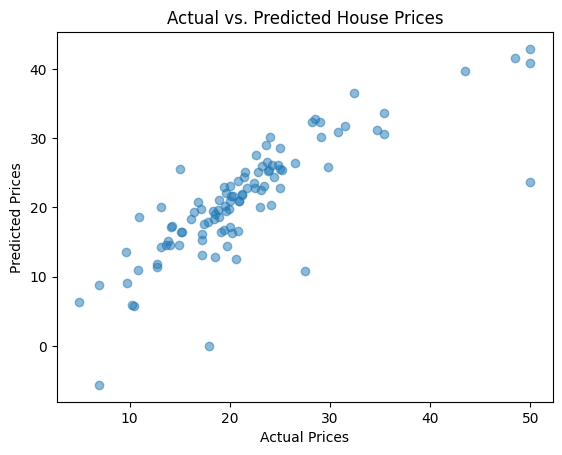

In [13]:
# Print first five predictions with actual values
results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred})
print(results.head())

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices")
plt.show()



In [14]:

# Save the trained model using pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)


In [15]:

app = Flask(__name__)
run_with_ngrok(app)


In [16]:
# Define an API endpoint for predictions
@app.route("/predict", methods=["POST"])
def predict():
    try:
        # Get JSON data from the request
        data = request.get_json()
        # Convert input features into a NumPy array
        features = np.array(data["features"]).reshape(1, -1)
        # Load the saved model
        with open("model.pkl", "rb") as f:
            model = pickle.load(f)
        # Make a prediction
        prediction = model.predict(features)[0]
        # Return the prediction as JSON
        return jsonify({"predicted_price": prediction})
    except Exception as e:
        # Handle errors and return as JSON
        return jsonify({"error": str(e)})


In [19]:
# Run the Flask app with Ngrok
if __name__ == "__main__":
    app.run()
